# Setting up Kaggle

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

In [ ]:
! unzip fruit-and-vegetable-image-recognition.zip -d dataset

# Transfer Learning

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
training_path = "/content/dataset/train"
test_path = "/content/dataset/test"

In [9]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True,
)

train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (224,224),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

test_dataset_aug = dataGen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 3581 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [10]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                                include_top=False,
                                                weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [11]:
pretrained_model.trainable = False

In [12]:
model = tf.keras.models.Sequential()

In [13]:
model.add(pretrained_model)

In [14]:
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [15]:
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(36, activation='softmax'))

In [16]:
model.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [17]:
history = model.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 15)

Epoch 1/15
  5/112 [>.............................] - ETA: 2:14 - loss: 3.7032 - accuracy: 0.0656

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 23/112 [=====>........................] - ETA: 2:01 - loss: 3.1907 - accuracy: 0.2066

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


112/112 [==============================] - 208s 2s/step - loss: 2.1461 - accuracy: 0.4397 - val_loss: 0.4616 - val_accuracy: 0.8468
Epoch 2/15
112/112 [==============================] - 173s 2s/step - loss: 0.7057 - accuracy: 0.7782 - val_loss: 0.2773 - val_accuracy: 0.9053
Epoch 3/15
112/112 [==============================] - 174s 2s/step - loss: 0.5312 - accuracy: 0.8225 - val_loss: 0.2580 - val_accuracy: 0.9081
Epoch 4/15
112/112 [==============================] - 175s 2s/step - loss: 0.4293 - accuracy: 0.8562 - val_loss: 0.1612 - val_accuracy: 0.9276
Epoch 5/15
112/112 [==============================] - 173s 2s/step - loss: 0.3058 - accuracy: 0.8972 - val_loss: 0.1565 - val_accuracy: 0.9276
Epoch 6/15
112/112 [==============================] - 173s 2s/step - loss: 0.2498 - accuracy: 0.9132 - val_loss: 0.1546 - val_accuracy: 0.9248
Epoch 7/15
112/112 [==============================] - 173s 2s/step - loss: 0.2728 - accuracy: 0.9041 - val_loss: 0.1494 - val_accuracy: 0.9387
Epoch 8/15

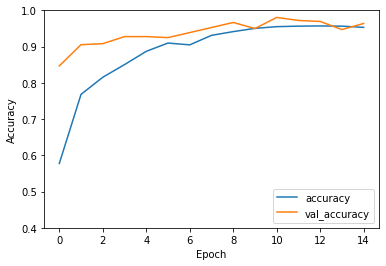

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

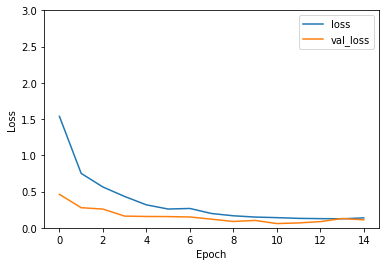

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,3])
plt.legend(loc='upper right')

In [26]:
!mkdir -p saved_model
model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model/assets


In [28]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive
